# Data Augmentation

### Data augmentation occurs when you create new data based on modifications of your existing data.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
from imageio import imread
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [16]:
# plots images with labels within jupter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [17]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, 
                        zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)

In [18]:
Image_path = 'cats-and-dogs/train/dog/dog.1000.jpg'

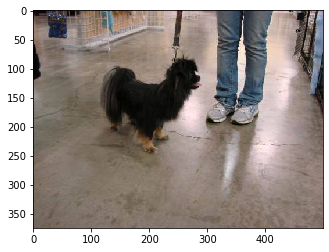

In [20]:
# Obtain image
image = np.expand_dims(imread(Image_path),0)
plt.imshow(image[0])

In [21]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [22]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

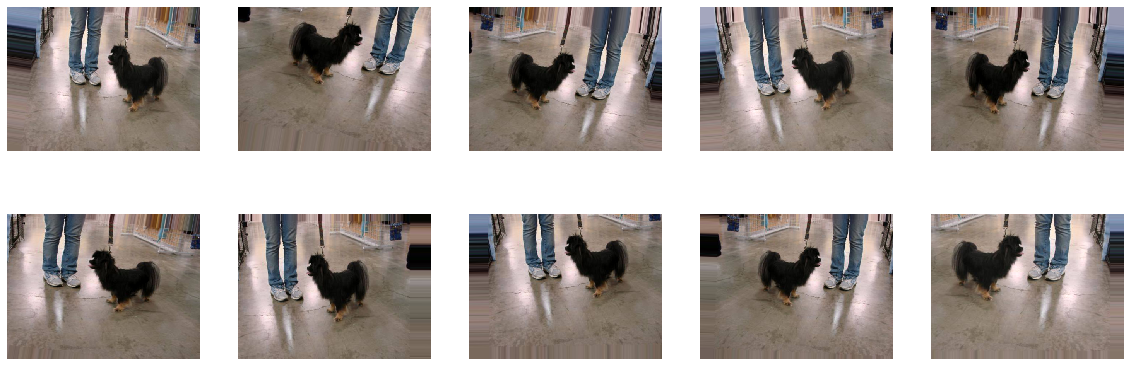

In [23]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)